In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import skew,norm

import warnings
warnings.filterwarnings("ignore")

In [7]:
pd.set_option('display.max_rows', None)
df_train = pd.read_csv("https://raw.githubusercontent.com/gyan4992000/Housing-Project/main/training%20data.csv")
df_test = pd.read_csv("https://raw.githubusercontent.com/gyan4992000/Housing-Project/main/testing%20Data.csv")

In [8]:
df_train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [9]:
df_test.head()train_ID =df_train['Id']
test_ID = df_test['Id']

#Drop the ID column since it is unnecessary for the prediction process
df_train.drop("Id",axis =1,inplace = True)
df_test.drop("Id",axis =1,inplace= True)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [10]:
print(df_train.shape)
print(df_test.shape)

(1168, 81)
(292, 80)


In [11]:
train_ID =df_train['Id']
test_ID = df_test['Id']

df_train.drop("Id",axis =1,inplace = True)
df_test.drop("Id",axis =1,inplace= True)

In [12]:
df_train.columns


Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [13]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    954 non-null    float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   Alley          77 non-null     object 
 6   LotShape       1168 non-null   object 
 7   LandContour    1168 non-null   object 
 8   Utilities      1168 non-null   object 
 9   LotConfig      1168 non-null   object 
 10  LandSlope      1168 non-null   object 
 11  Neighborhood   1168 non-null   object 
 12  Condition1     1168 non-null   object 
 13  Condition2     1168 non-null   object 
 14  BldgType       1168 non-null   object 
 15  HouseStyle     1168 non-null   object 
 16  OverallQual    1168 non-null   int64  
 17  OverallCond    1168 non-null   int64  
 18  YearBuil

In [14]:
df_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     292 non-null    int64  
 1   MSZoning       292 non-null    object 
 2   LotFrontage    247 non-null    float64
 3   LotArea        292 non-null    int64  
 4   Street         292 non-null    object 
 5   Alley          14 non-null     object 
 6   LotShape       292 non-null    object 
 7   LandContour    292 non-null    object 
 8   Utilities      292 non-null    object 
 9   LotConfig      292 non-null    object 
 10  LandSlope      292 non-null    object 
 11  Neighborhood   292 non-null    object 
 12  Condition1     292 non-null    object 
 13  Condition2     292 non-null    object 
 14  BldgType       292 non-null    object 
 15  HouseStyle     292 non-null    object 
 16  OverallQual    292 non-null    int64  
 17  OverallCond    292 non-null    int64  
 18  YearBuilt 

In [15]:
df_train.describe()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,954.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,56.767979,70.98847,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,46.647260,...,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,41.940650,24.82875,8957.442311,1.390153,1.124343,30.145255,20.785185,182.595606,462.664785,163.520016,...,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,20.000000,21.00000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.00000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,50.000000,70.00000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,0.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,70.000000,80.00000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,0.000000,...,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,190.000000,313.00000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [16]:
df_train.select_dtypes(include="object").describe()


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1168,1168,77,1168,1168,1168,1168,1168,1168,1168,...,1104,1104,1104,1104,1168,7,237,44,1168,1168
unique,5,2,2,4,4,1,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,928,1164,41,740,1046,1168,842,1105,182,1005,...,691,487,1050,1061,1071,3,129,40,999,945


In [17]:
df_test.describe()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold
count,292.000000,247.000000,292.000000,292.000000,292.000000,292.000000,292.000000,291.000000,292.000000,292.000000,...,292.000000,292.000000,292.000000,292.000000,292.000000,292.0,0.0,292.000000,292.000000,292.000000
mean,57.414384,66.425101,10645.143836,6.078767,5.493151,1972.616438,1985.294521,109.171821,439.294521,46.157534,...,86.397260,47.061644,17.708904,2.489726,15.099315,0.0,NaN,28.184932,6.232877,2007.859589
std,43.780649,21.726343,13330.669795,1.356147,1.063267,30.447016,20.105792,175.030021,429.559675,152.467119,...,121.898836,65.865449,51.892906,30.247488,58.483473,0.0,NaN,224.036218,2.774556,1.322867
min,20.000000,21.000000,1526.000000,3.000000,3.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,1.000000,2006.000000
25%,20.000000,53.500000,7200.000000,5.000000,5.000000,1954.000000,1968.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,4.000000,2007.000000
50%,50.000000,65.000000,9200.000000,6.000000,5.000000,1976.000000,1994.000000,0.000000,369.500000,0.000000,...,0.000000,28.500000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,6.000000,2008.000000
75%,70.000000,79.000000,11658.750000,7.000000,6.000000,2001.000000,2003.250000,180.000000,700.500000,0.000000,...,149.250000,66.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,8.000000,2009.000000
max,190.000000,150.000000,215245.000000,10.000000,9.000000,2009.000000,2010.000000,1031.000000,1767.000000,1085.000000,...,728.000000,418.000000,330.000000,407.000000,396.000000,0.0,NaN,3500.000000,12.000000,2010.000000


In [18]:
df_test.select_dtypes(include="object").describe()


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,MiscFeature,SaleType,SaleCondition
count,292,292,14,292,292,292,292,292,292,292,...,153,275,275,275,275,292,44,10,292,292
unique,4,2,2,4,4,2,5,3,24,8,...,5,6,3,5,5,3,4,2,6,4
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Gd,Attchd,Unf,TA,TA,Y,MnPrv,Shed,WD,Normal
freq,223,290,9,185,265,291,210,277,43,255,...,79,179,118,261,265,269,28,9,268,253


In [22]:
cat_col_tr = df_train.select_dtypes(include ="object")
for i in cat_col_tr:
    print(i)
    print(cat_col_tr[i].value_counts())
    print('\n')

MSZoning
RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64


Street
Pave    1164
Grvl       4
Name: Street, dtype: int64


Alley
Grvl    41
Pave    36
Name: Alley, dtype: int64


LotShape
Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64


LandContour
Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64


Utilities
AllPub    1168
Name: Utilities, dtype: int64


LotConfig
Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64


LandSlope
Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64


Neighborhood
NAmes      182
CollgCr    118
OldTown     86
Edwards     83
Somerst     68
Gilbert     64
NridgHt     61
Sawyer      60
NWAmes      59
SawyerW     51
BrkSide     50
Crawfor     45
NoRidge     35
Mitchel     34
IDOTRR      30
Timber      24
ClearCr     24
SWISU       21
StoneBr     19
Blmngtn     15
BrDale      11
MeadowV  

In [23]:
cat_col_test = df_test.select_dtypes(include ="object")
for i in cat_col_test:
    print(i)
    print(cat_col_test[i].value_counts())
    print('\n')

MSZoning
RL         223
RM          55
FV          13
C (all)      1
Name: MSZoning, dtype: int64


Street
Pave    290
Grvl      2
Name: Street, dtype: int64


Alley
Grvl    9
Pave    5
Name: Alley, dtype: int64


LotShape
Reg    185
IR1     94
IR2      9
IR3      4
Name: LotShape, dtype: int64


LandContour
Lvl    265
Bnk     13
HLS      8
Low      6
Name: LandContour, dtype: int64


Utilities
AllPub    291
NoSeWa      1
Name: Utilities, dtype: int64


LotConfig
Inside     210
Corner      41
CulDSac     25
FR2         14
FR3          2
Name: LotConfig, dtype: int64


LandSlope
Gtl    277
Mod     14
Sev      1
Name: LandSlope, dtype: int64


Neighborhood
NAmes      43
CollgCr    32
OldTown    27
Somerst    18
Edwards    17
NridgHt    16
Gilbert    15
Mitchel    15
Timber     14
Sawyer     14
NWAmes     14
MeadowV     8
SawyerW     8
BrkSide     8
IDOTRR      7
NoRidge     6
StoneBr     6
Crawfor     6
BrDale      5
SWISU       4
ClearCr     4
Blmngtn     2
Veenker     2
NPkVill     1
N

In [24]:
df_train.isnull().sum()


MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

<AxesSubplot:>

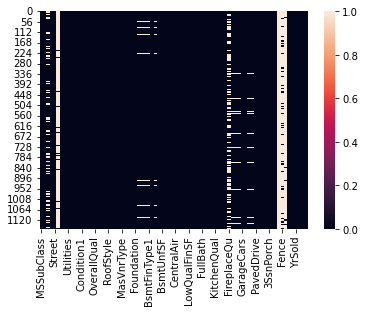

In [25]:
sns.heatmap(df_train.isnull())


In [26]:
df_test.isnull().sum()


MSSubClass         0
MSZoning           0
LotFrontage       45
LotArea            0
Street             0
Alley            278
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         1
MasVnrArea         1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           7
BsmtCond           7
BsmtExposure       7
BsmtFinType1       7
BsmtFinSF1         0
BsmtFinType2       7
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

In [27]:
from sklearn.impute import SimpleImputer
imp= SimpleImputer(strategy="most_frequent")

df_test["Electrical"]= imp.fit_transform(df_test["Electrical"].values.reshape(-1,1))
df_train["GarageCond"]= imp.fit_transform(df_train["GarageCond"].values.reshape(-1,1))
df_test["GarageCond"]= imp.fit_transform(df_test["GarageCond"].values.reshape(-1,1))

In [28]:
null_object_col = df_train.loc[:,df_train.isnull().sum() != 0].loc[:,df_train.loc[:,df_train.isnull().sum() != 0].dtypes == 'O'].columns
null_object_col

Index(['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'PoolQC', 'Fence', 'MiscFeature'],
      dtype='object')

In [29]:
null_num_col = df_train.loc[:,df_train.isnull().sum() != 0].loc[:,df_train.loc[:,df_train.isnull().sum() != 0].dtypes != 'O'].columns
null_num_col

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [30]:
for i in null_object_col:
    df_train[i].fillna('Not available', inplace=True)
    
# handle null values on object columns test set
for i in null_object_col:
    df_test[i].fillna('Not available', inplace=True)

In [32]:
df_train['LotFrontage'].fillna(df_train['LotFrontage'].mean(), inplace=True)
df_train["GarageYrBlt"].fillna(df_train["GarageYrBlt"].mean(), inplace=True)
df_train["MasVnrArea"].fillna(df_train["MasVnrArea"].mean(), inplace=True)


df_test['LotFrontage'].fillna(df_test['LotFrontage'].mean(), inplace=True)
df_test["GarageYrBlt"].fillna(df_test["GarageYrBlt"].mean(), inplace=True)
df_test["MasVnrArea"].fillna(df_test["MasVnrArea"].mean(), inplace=True)

In [33]:
df_train.isnull().sum().sum()


0

In [34]:
df_test.isnull().sum().sum()


0

In [35]:
categorial_features = df_train.select_dtypes(include=[np.object])
categorial_features.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,Not available,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,...,Attchd,RFn,TA,TA,Y,Not available,Not available,Not available,WD,Normal
1,RL,Pave,Not available,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Not available,Not available,Not available,WD,Normal
2,RL,Pave,Not available,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,...,Attchd,Unf,TA,TA,Y,Not available,Not available,Not available,WD,Normal
3,RL,Pave,Not available,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,RFn,TA,TA,Y,Not available,MnPrv,Not available,COD,Normal
4,RL,Pave,Not available,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,...,Attchd,Fin,TA,TA,Y,Not available,Not available,Not available,WD,Normal


In [36]:
numerical_features = df_train.select_dtypes(include=[np.number])
numerical_features.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,120,70.98847,4928,6,5,1976,1976,0.0,120,0,...,0,205,0,0,0,0,0,2,2007,128000
1,20,95.00000,15865,8,6,1970,1970,0.0,351,823,...,81,207,0,0,224,0,0,10,2007,268000
2,60,92.00000,9920,7,5,1996,1997,0.0,862,0,...,180,130,0,0,0,0,0,6,2007,269790
3,20,105.00000,11751,6,6,1977,1977,480.0,705,0,...,0,122,0,0,0,0,0,1,2010,190000
4,20,70.98847,16635,6,7,1977,2000,126.0,1246,0,...,240,0,0,0,0,0,0,6,2009,215000


In [37]:
df_train['SalePrice'].describe()


count      1168.000000
mean     181477.005993
std       79105.586863
min       34900.000000
25%      130375.000000
50%      163995.000000
75%      215000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:>

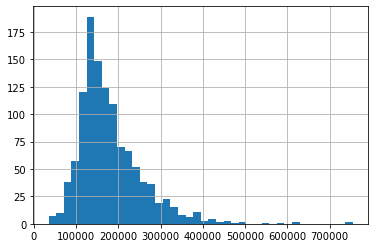

In [38]:
df_train['SalePrice'].hist(bins = 40)


In [39]:
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.953878
Kurtosis: 7.390657


<AxesSubplot:>

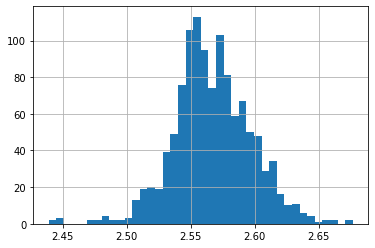

In [41]:
df_train["SalePrice"] = np.log1p(df_train["SalePrice"])

df_train['SalePrice'].hist(bins = 40)


In [42]:
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: -0.065793
Kurtosis: 1.109139


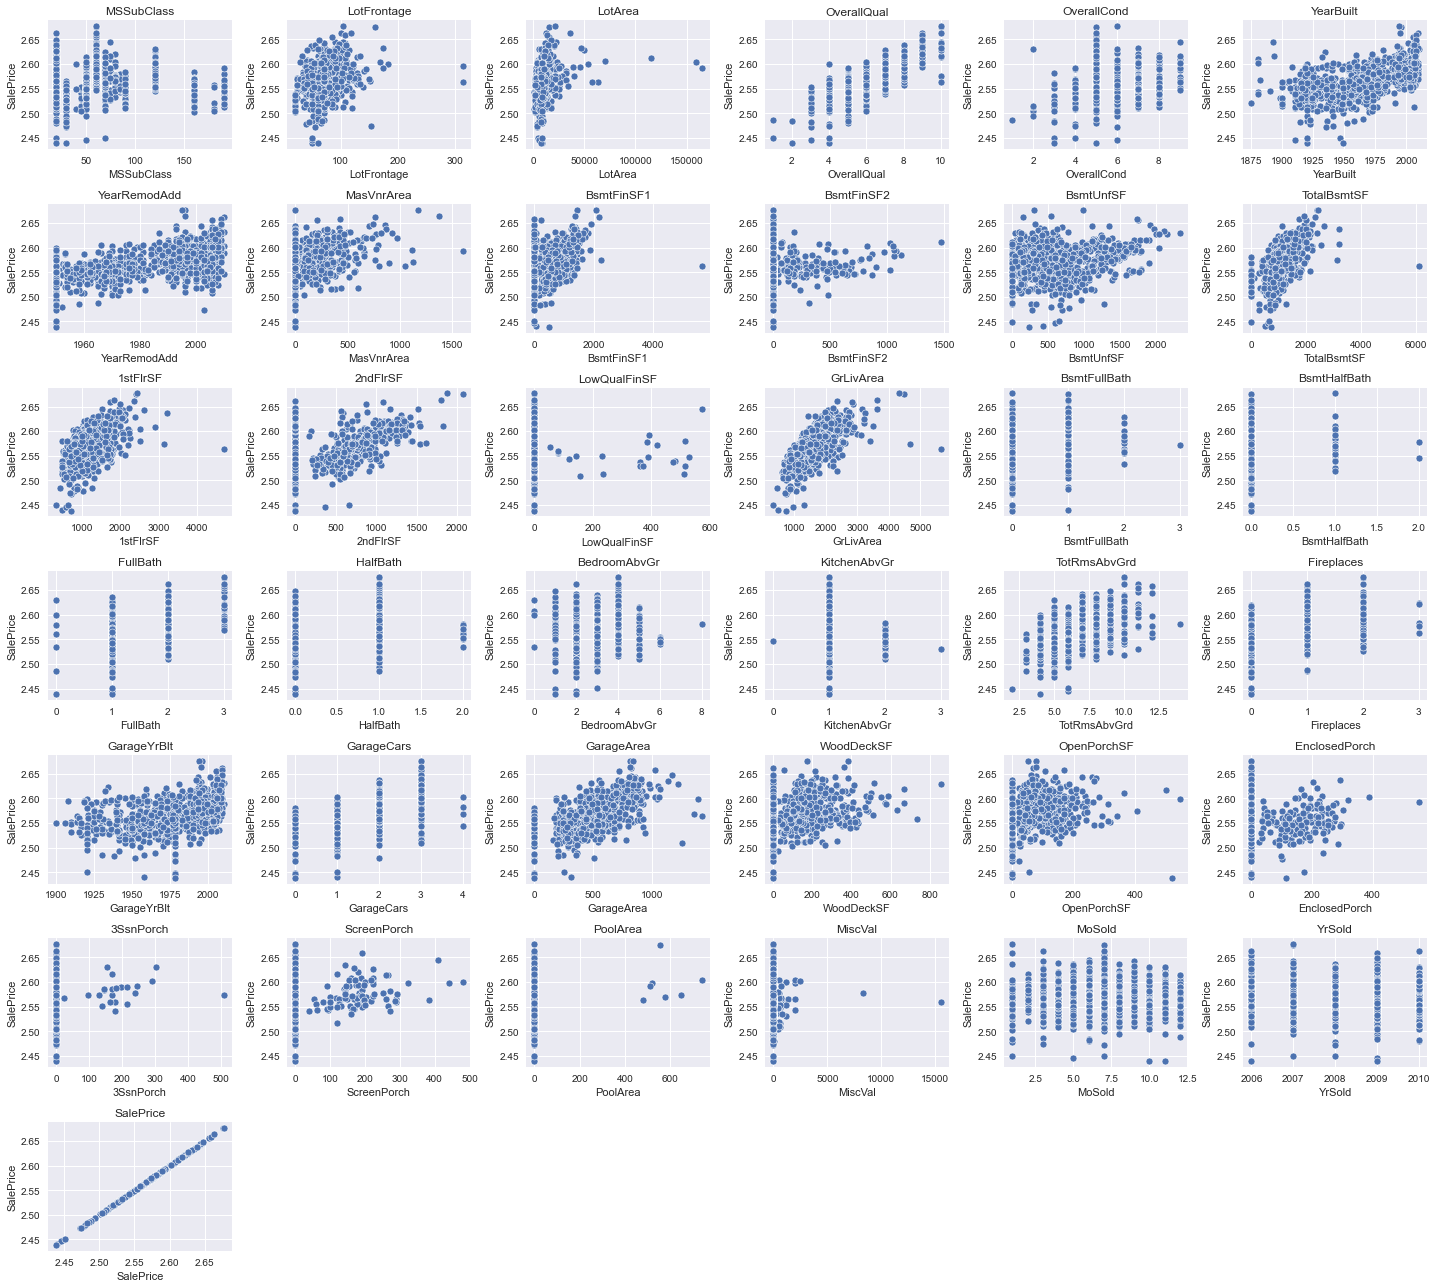

In [43]:
num_var = df_train.select_dtypes(exclude= ["O"]).columns
plt.style.use("seaborn")
fig, axs = plt.subplots(7, 6, figsize=(20,18))

for i in range(42):
  ax = axs[i//6, i%6]
  try:
    sns.scatterplot(x=df_train[num_var[i]], y=df_train['SalePrice'], ax=ax)
    ax.set_title(num_var.values[i])
  except:
    axs[-1,i%6].axis('off')
  
plt.tight_layout()
plt.show()

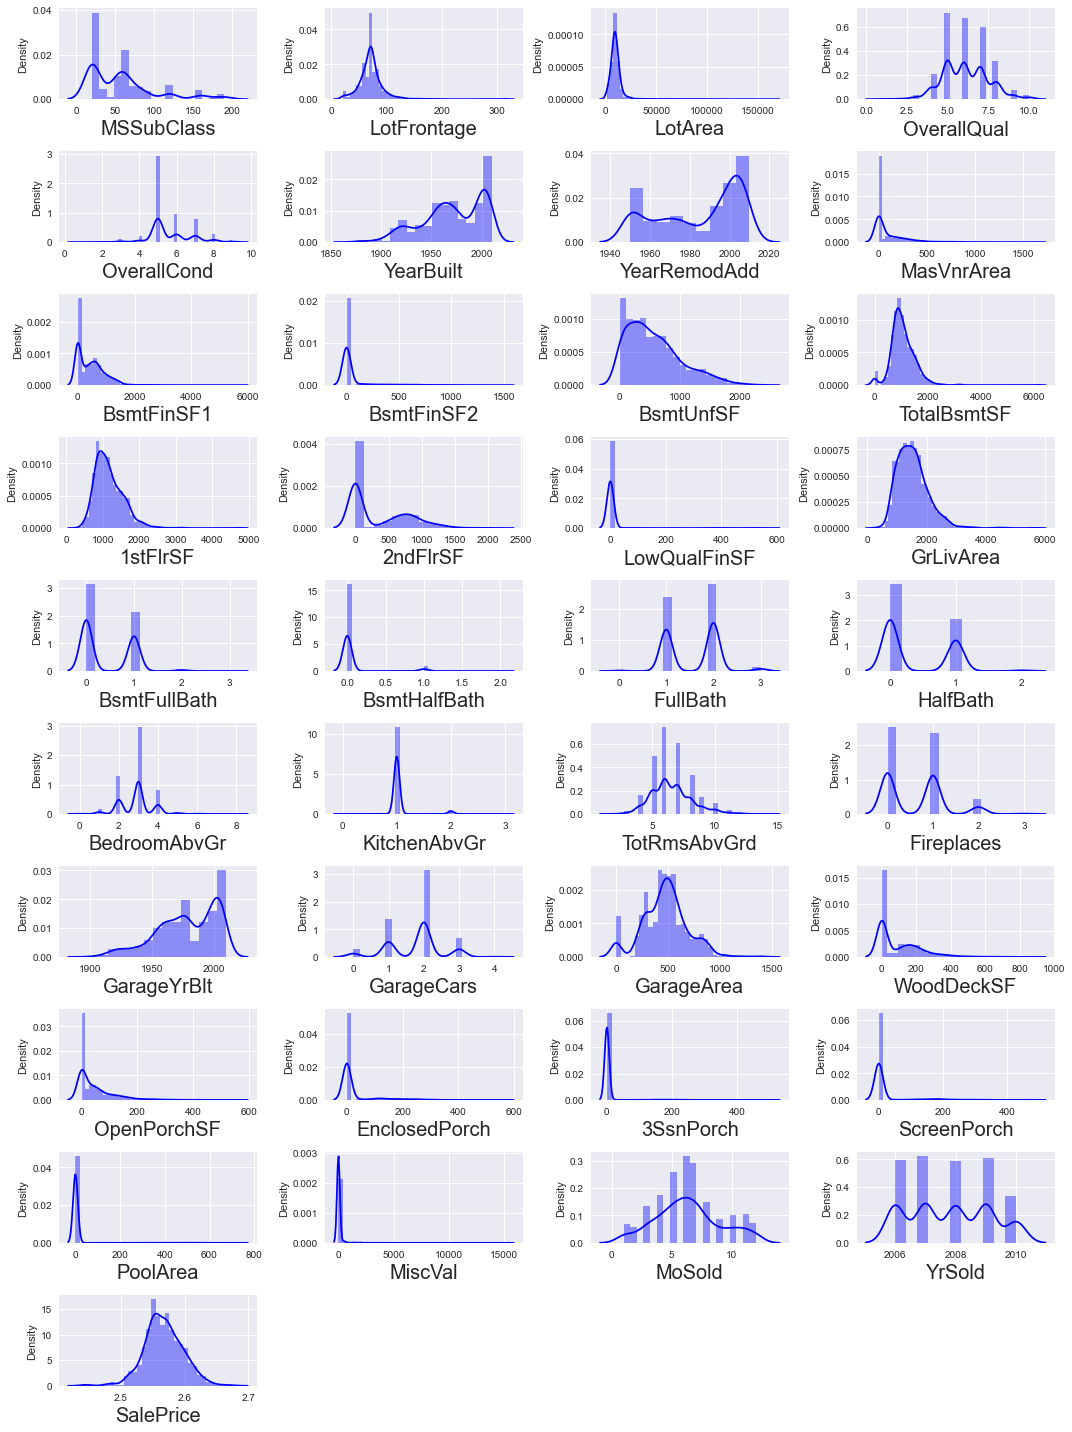

In [44]:
plt.figure(figsize=(15,20),facecolor='white')
plotnumber=1
for column in num_var:
    if plotnumber<=37:
        ax=plt.subplot(10,4,plotnumber)
        sns.distplot(df_train[column],color="b")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

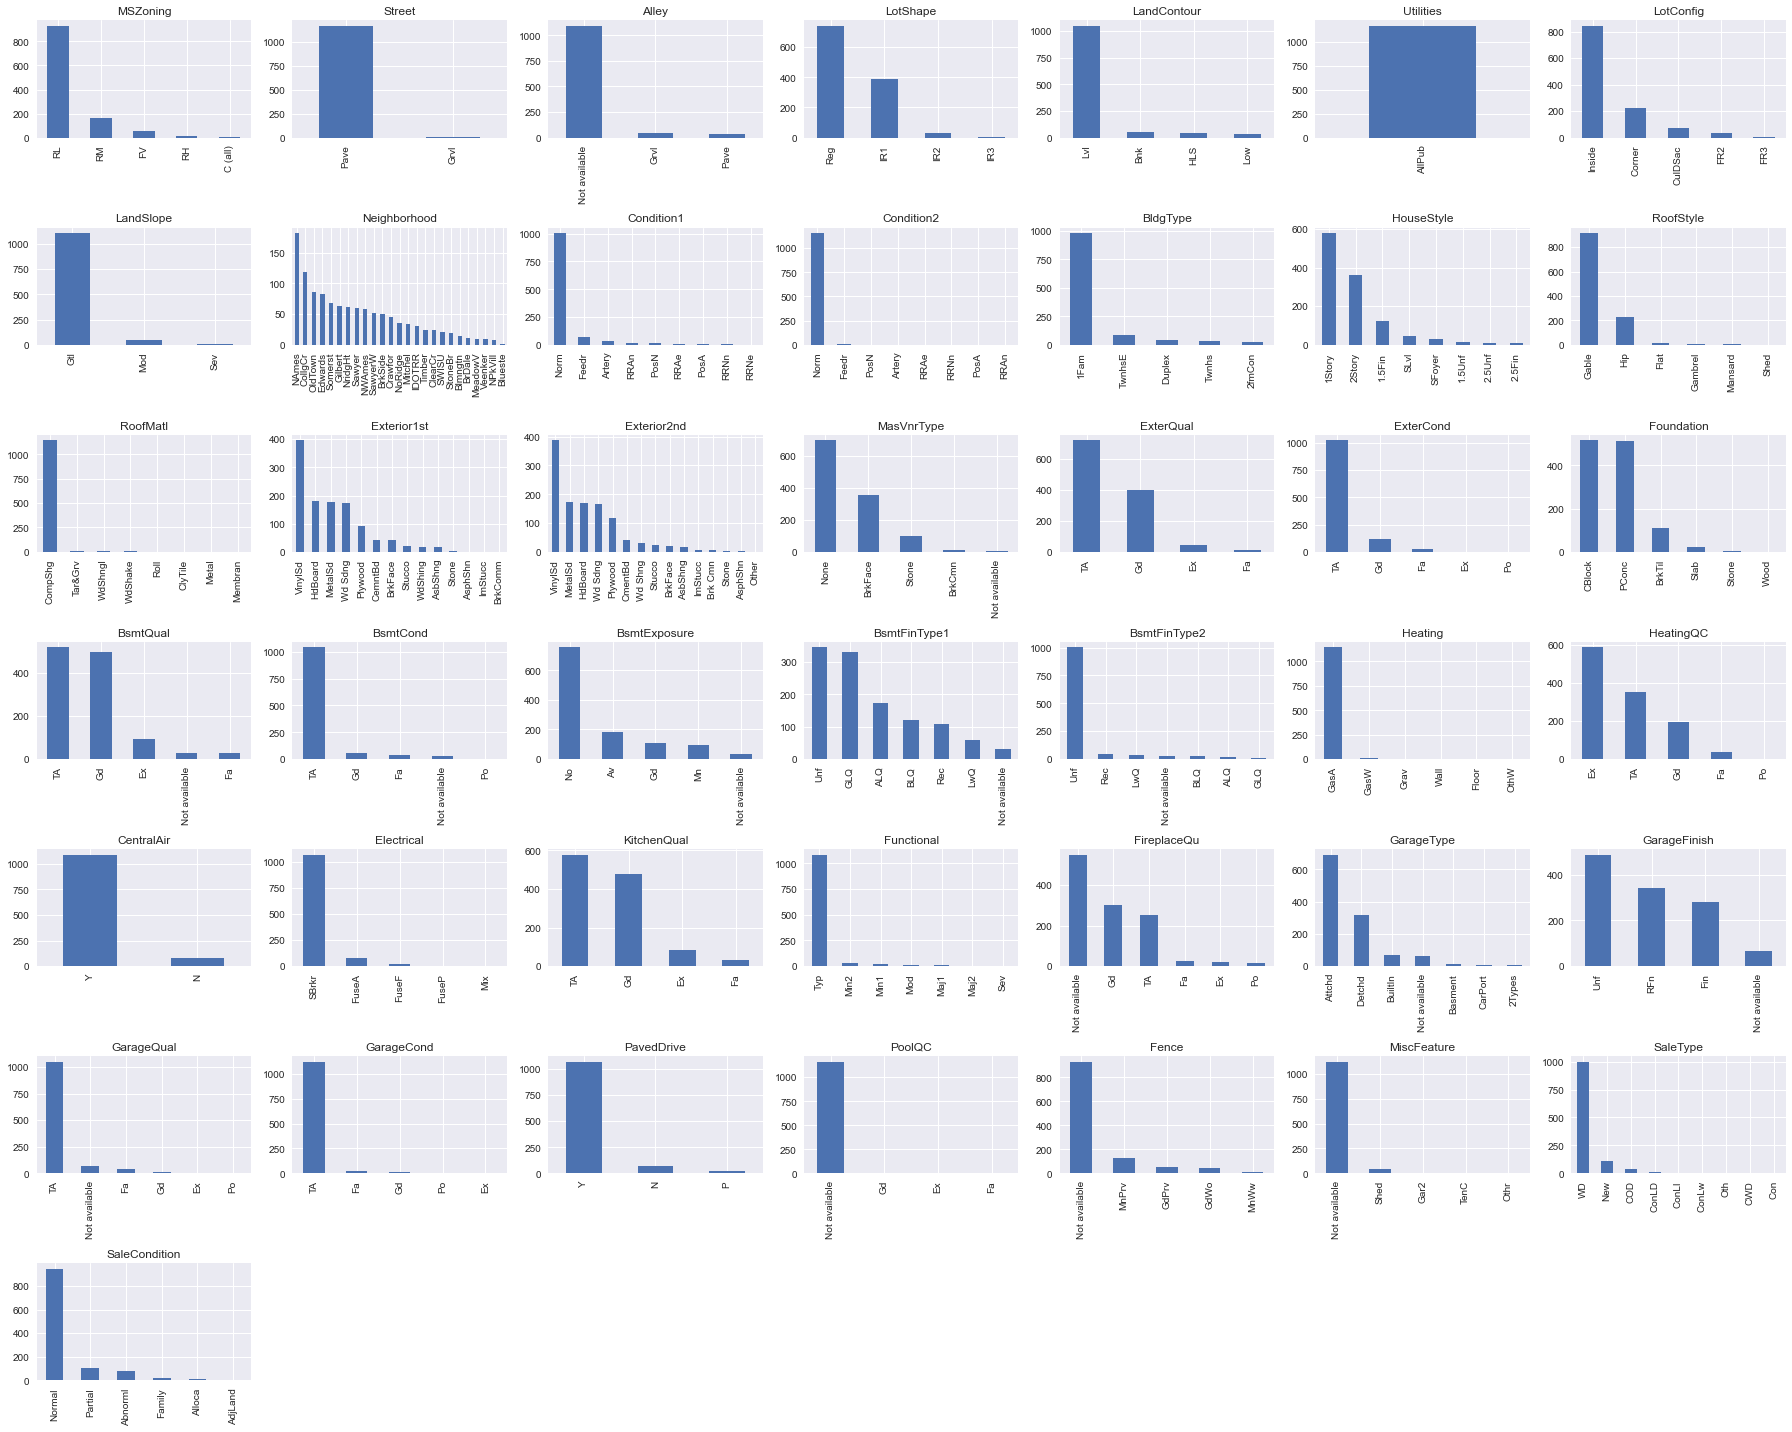

In [45]:
cat_var = df_train.select_dtypes(include= ["object"]).columns

# Plot bar chart untuk masing - masing variabel kategorik
plt.style.use("seaborn")
fig, axs = plt.subplots(7, 7, figsize=(25,20))

for i in range(49):
  ax = axs[i//7, i%7]
  try:
    df_train[cat_var.values[i]].value_counts().plot(kind="bar", ax=ax)
    ax.set_title(cat_var.values[i])
  except:
    axs[-1,i%7].axis('off')

plt.tight_layout()
plt.show()

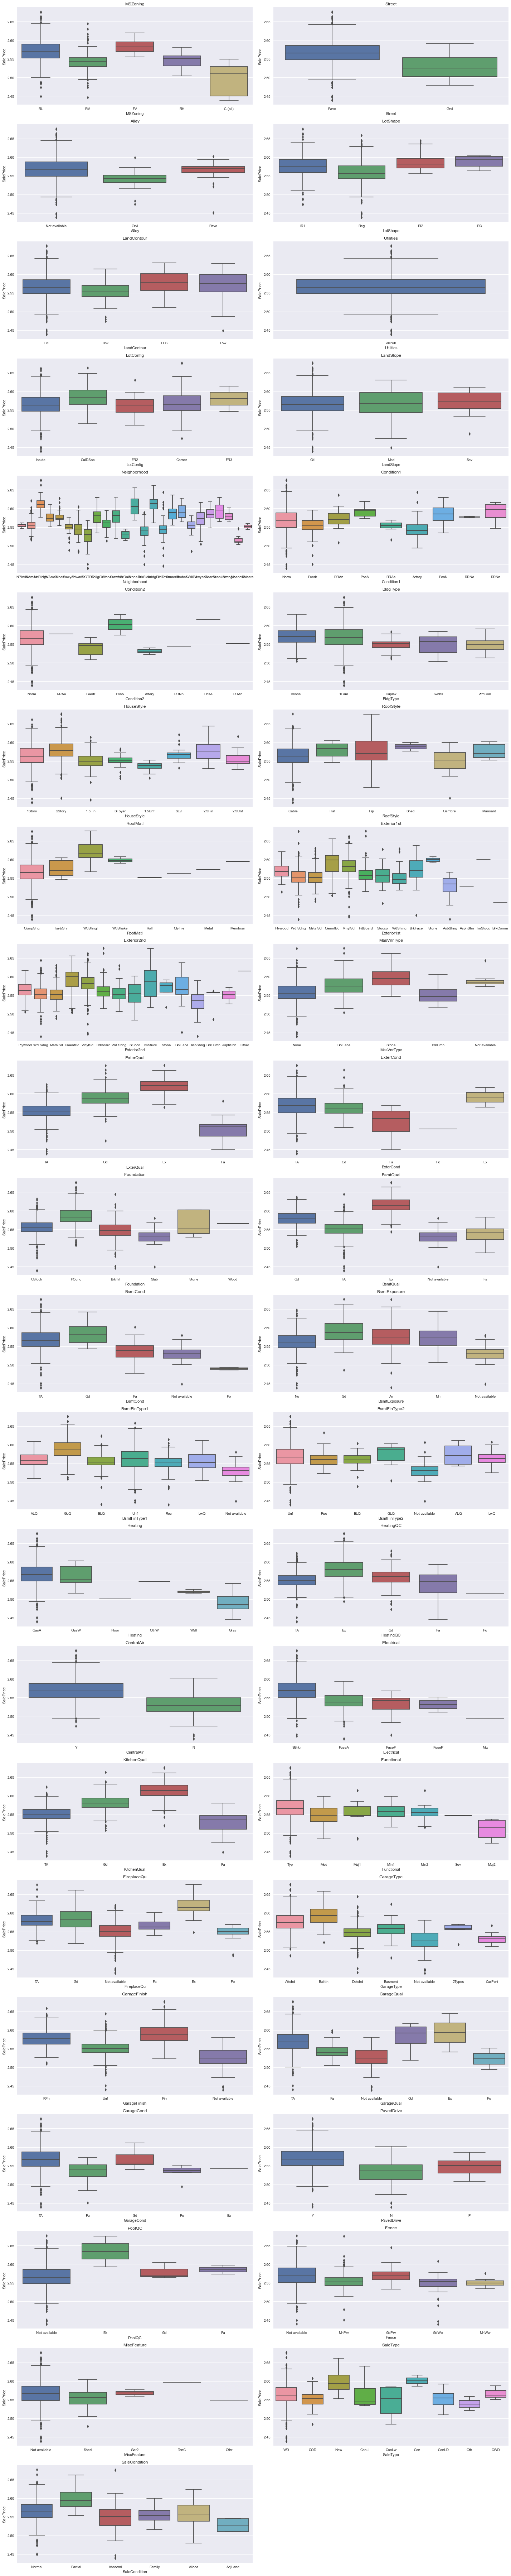

In [46]:
plt.style.use("seaborn")
fig, axs = plt.subplots(22, 2, figsize=(20,100))

for i in range(44):
  ax = axs[i//2, i%2]
  try:
    sns.boxplot(x=df_train[cat_var.values[i]], y=df_train['SalePrice'], ax=ax)
    ax.set_title(cat_var.values[i])
  except:
    axs[-1,i%2].axis('off')

plt.tight_layout()
plt.show()

<AxesSubplot:title={'center':'comparison between YearBuilt and SalePrice'}, xlabel='YearBuilt', ylabel='SalePrice'>

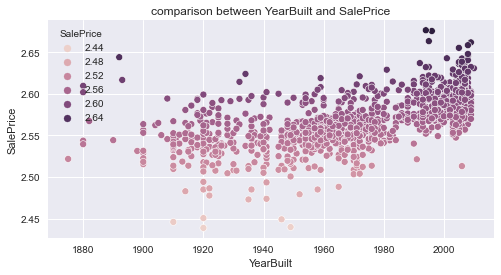

In [47]:
plt.figure(figsize=[8,4])
plt.title("comparison between YearBuilt and SalePrice")
sns.scatterplot(df_train['YearBuilt'],df_train['SalePrice'],hue=df_train["SalePrice"])

<AxesSubplot:title={'center':'comparison between OverallQual and SalePrice'}, xlabel='OverallQual', ylabel='SalePrice'>

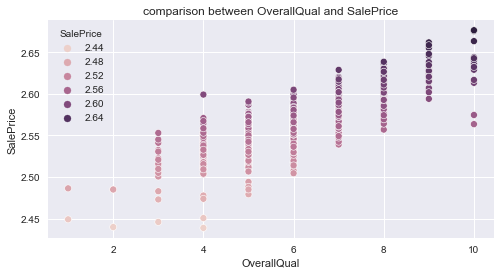

In [48]:
plt.figure(figsize=[8,4])
plt.title("comparison between OverallQual and SalePrice")
sns.scatterplot(df_train['OverallQual'],df_train['SalePrice'],hue=df_train["SalePrice"])

<AxesSubplot:title={'center':'comparison between GrLivArea and SalePrice'}, xlabel='GrLivArea', ylabel='SalePrice'>

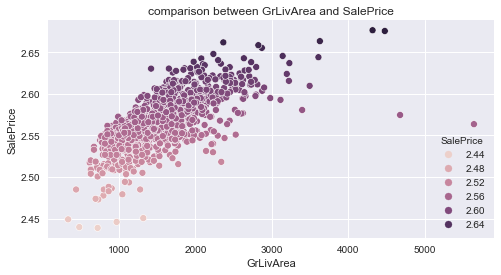

In [49]:
plt.figure(figsize=[8,4])
plt.title("comparison between GrLivArea and SalePrice")
sns.scatterplot(df_train['GrLivArea'],df_train['SalePrice'],hue=df_train["SalePrice"])

<AxesSubplot:title={'center':'comparison between GarageArea and SalePrice'}, xlabel='GarageArea', ylabel='SalePrice'>

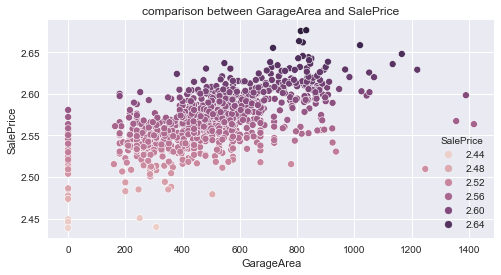

In [50]:
plt.figure(figsize=[8,4])
plt.title("comparison between GarageArea and SalePrice")
sns.scatterplot(df_train['GarageArea'],df_train['SalePrice'],hue=df_train["SalePrice"])

In [51]:
df_train.corr()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.336681,-0.124151,0.070462,-0.056978,0.023988,0.056618,0.027813,-0.052236,-0.062403,...,-0.022609,0.017468,-0.004252,-0.043210,-0.013291,0.009583,-0.023503,-0.016015,-0.038595,-0.044183
LotFrontage,-0.336681,1.000000,0.299452,0.229218,-0.047573,0.112655,0.088799,0.188758,0.228996,0.002159,...,0.088334,0.151328,0.020902,0.051084,0.030405,0.196001,-0.001329,0.022517,-0.003885,0.318694
LotArea,-0.124151,0.299452,1.000000,0.107188,0.017513,0.005506,0.027228,0.121086,0.221851,0.056656,...,0.216720,0.093080,-0.007446,0.025794,0.025256,0.097107,0.051679,0.015141,-0.035399,0.249115
OverallQual,0.070462,0.229218,0.107188,1.000000,-0.083167,0.575800,0.555945,0.407230,0.219643,-0.040893,...,0.227137,0.341030,-0.098374,0.045919,0.059387,0.072247,-0.025786,0.090638,-0.048759,0.816351
OverallCond,-0.056978,-0.047573,0.017513,-0.083167,1.000000,-0.377731,0.080669,-0.137475,-0.028810,0.044336,...,0.012290,-0.024899,0.056074,0.040476,0.069463,-0.003603,0.075178,0.005519,0.055517,-0.013247
YearBuilt,0.023988,0.112655,0.005506,0.575800,-0.377731,1.000000,0.592829,0.321905,0.227933,-0.027682,...,0.204830,0.191069,-0.373544,0.037079,-0.058760,0.006408,-0.030008,0.031754,-0.013976,0.576723
YearRemodAdd,0.056618,0.088799,0.027228,0.555945,0.080669,0.592829,1.000000,0.181385,0.114430,-0.044694,...,0.197410,0.238755,-0.193574,0.064763,-0.046220,0.006874,-0.001199,0.024663,0.033265,0.571524
MasVnrArea,0.027813,0.188758,0.121086,0.407230,-0.137475,0.321905,0.181385,1.000000,0.265735,-0.065707,...,0.151579,0.130885,-0.101941,0.018720,0.046498,0.013590,-0.027582,0.013363,-0.013462,0.412215
BsmtFinSF1,-0.052236,0.228996,0.221851,0.219643,-0.028810,0.227933,0.114430,0.265735,1.000000,-0.052145,...,0.192939,0.108802,-0.082351,0.025485,0.033490,0.154769,0.008314,0.007482,0.005614,0.346538
BsmtFinSF2,-0.062403,0.002159,0.056656,-0.040893,0.044336,-0.027682,-0.044694,-0.065707,-0.052145,1.000000,...,0.094690,-0.014103,0.032081,-0.031263,0.076561,0.045990,0.007915,-0.014605,0.038438,0.016379


<AxesSubplot:>

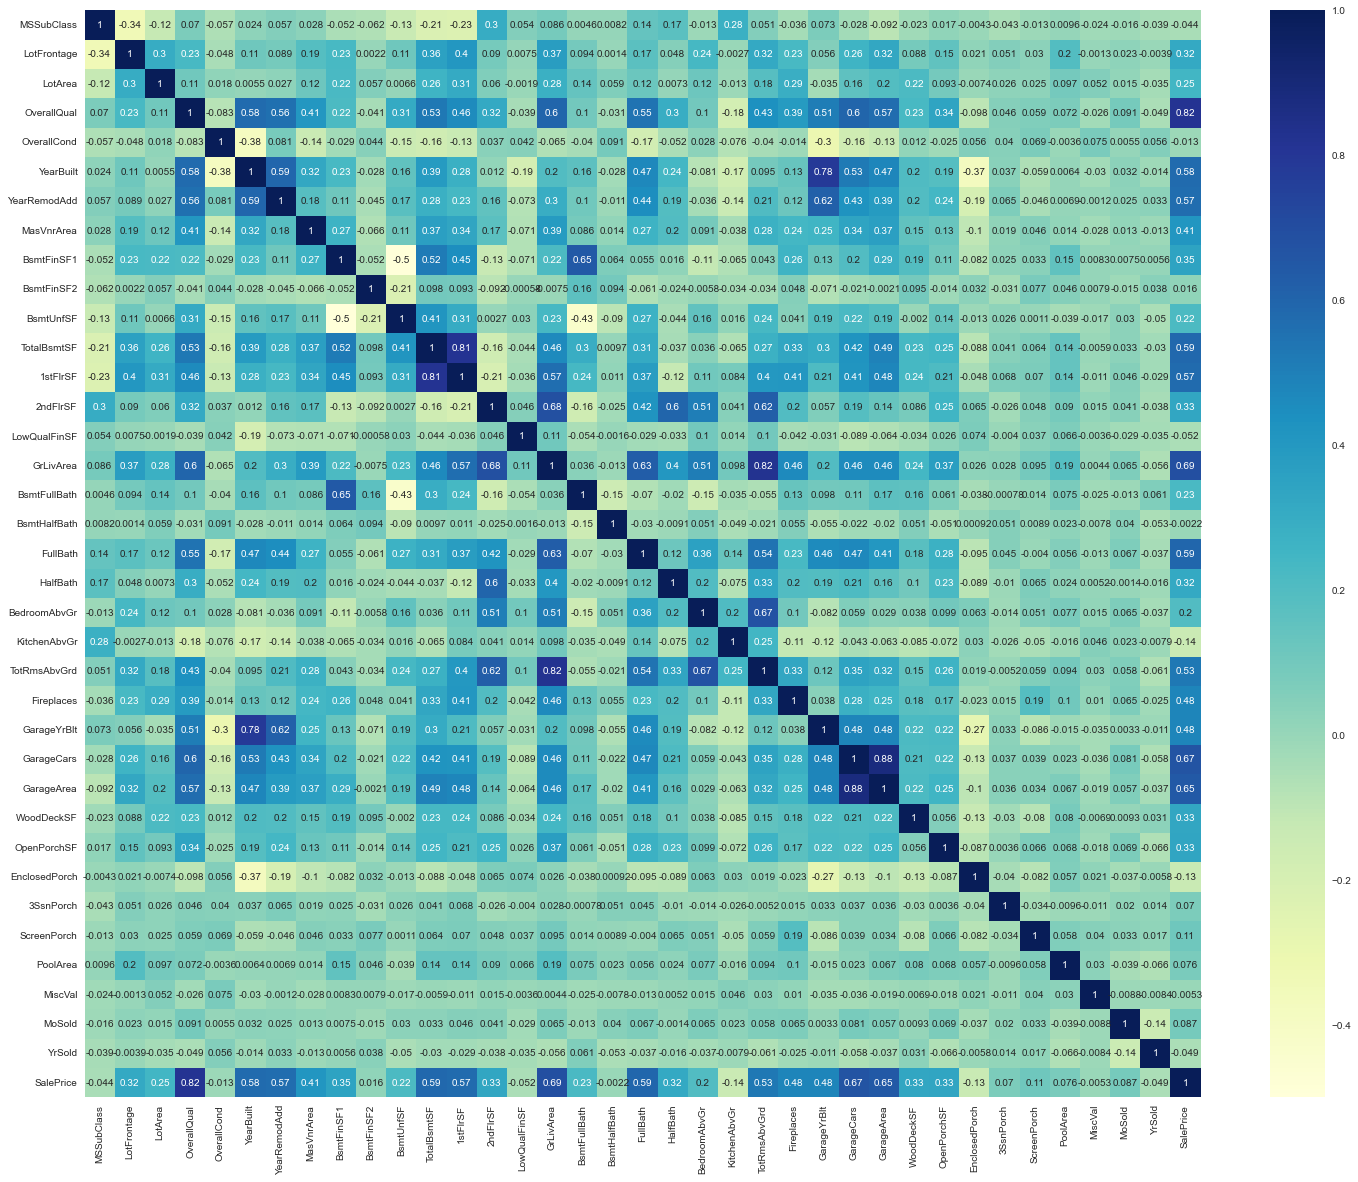

In [52]:
plt.figure(figsize=(25,20))
sns.heatmap(df_train.corr(),cmap='YlGnBu',annot=True)

<AxesSubplot:>

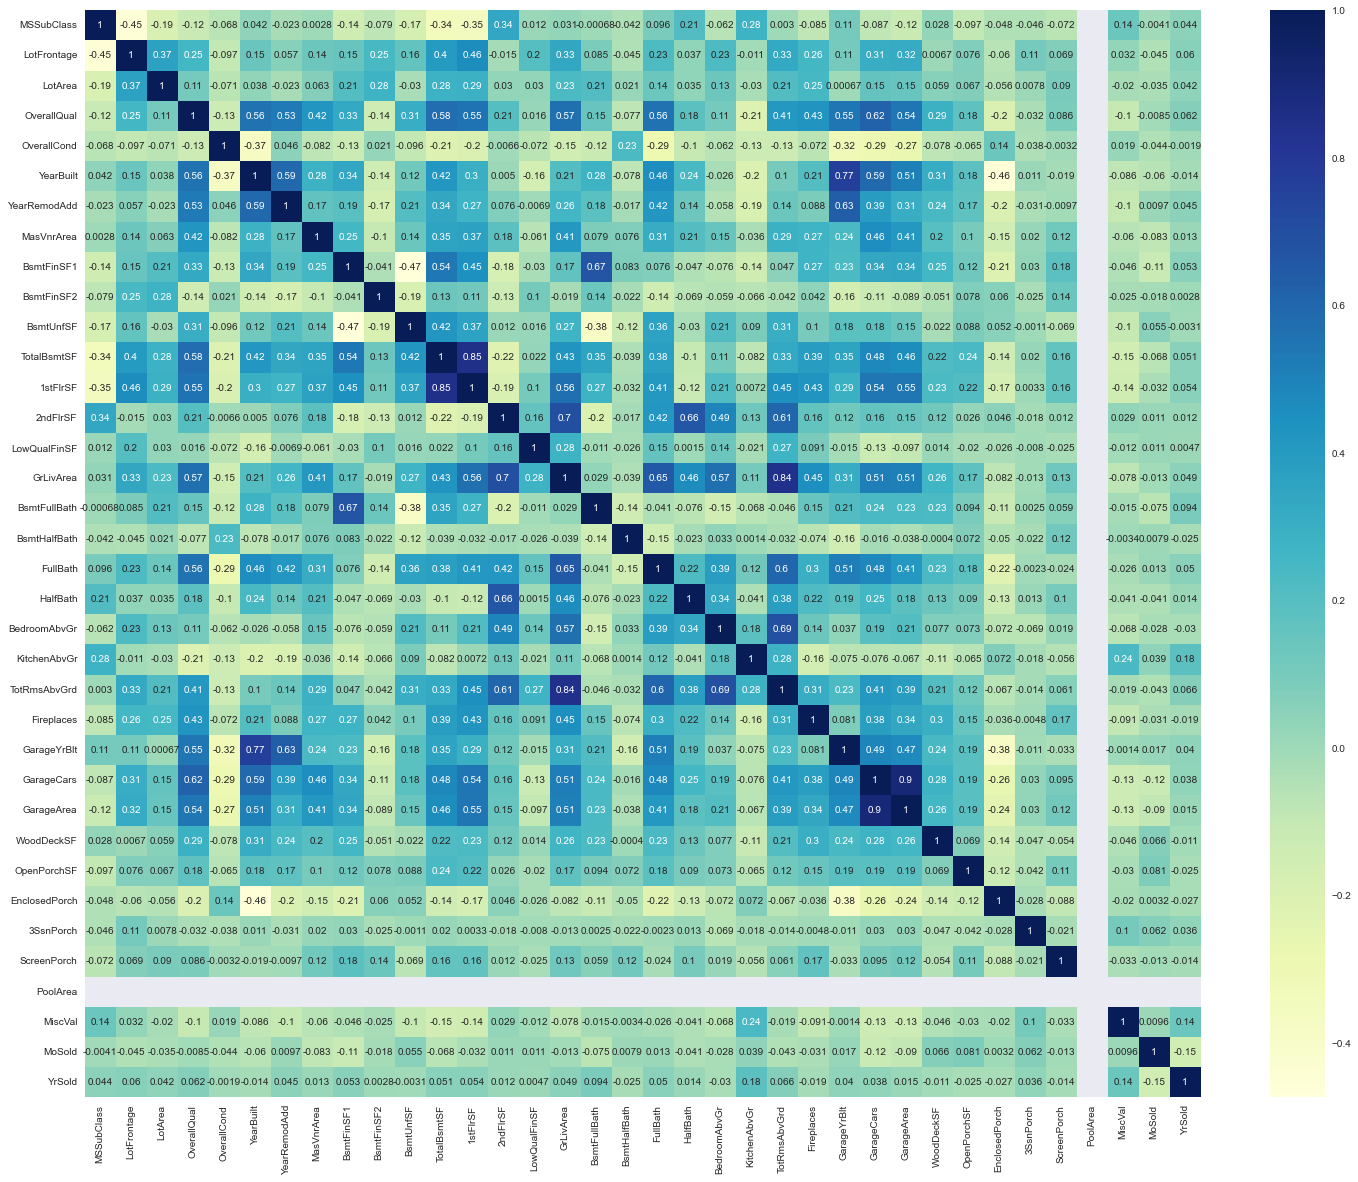

In [53]:
plt.figure(figsize=(25,20))
sns.heatmap(df_test.corr(),cmap='YlGnBu',annot=True)

In [54]:
cols = df_train.corr().nlargest(10, 'SalePrice')['SalePrice'].index
cols


Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'FullBath', 'TotalBsmtSF', 'YearBuilt', '1stFlrSF', 'YearRemodAdd'],
      dtype='object')

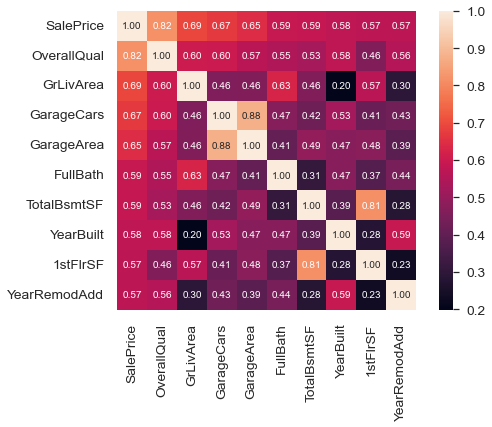

In [55]:
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values,
                 xticklabels=cols.values)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

In [56]:
X = df_train.drop('SalePrice', axis=1)
y = df_train['SalePrice'].values

In [57]:
new_num_var = X.select_dtypes(exclude='O').columns.values
new_num_var

array(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'], dtype=object)

In [58]:
(X[new_num_var] < 0).sum().sum()


0

			BOXPLOT fOR NUMERICAL BEFORE REMOVING OUTLIERS FROM THEM


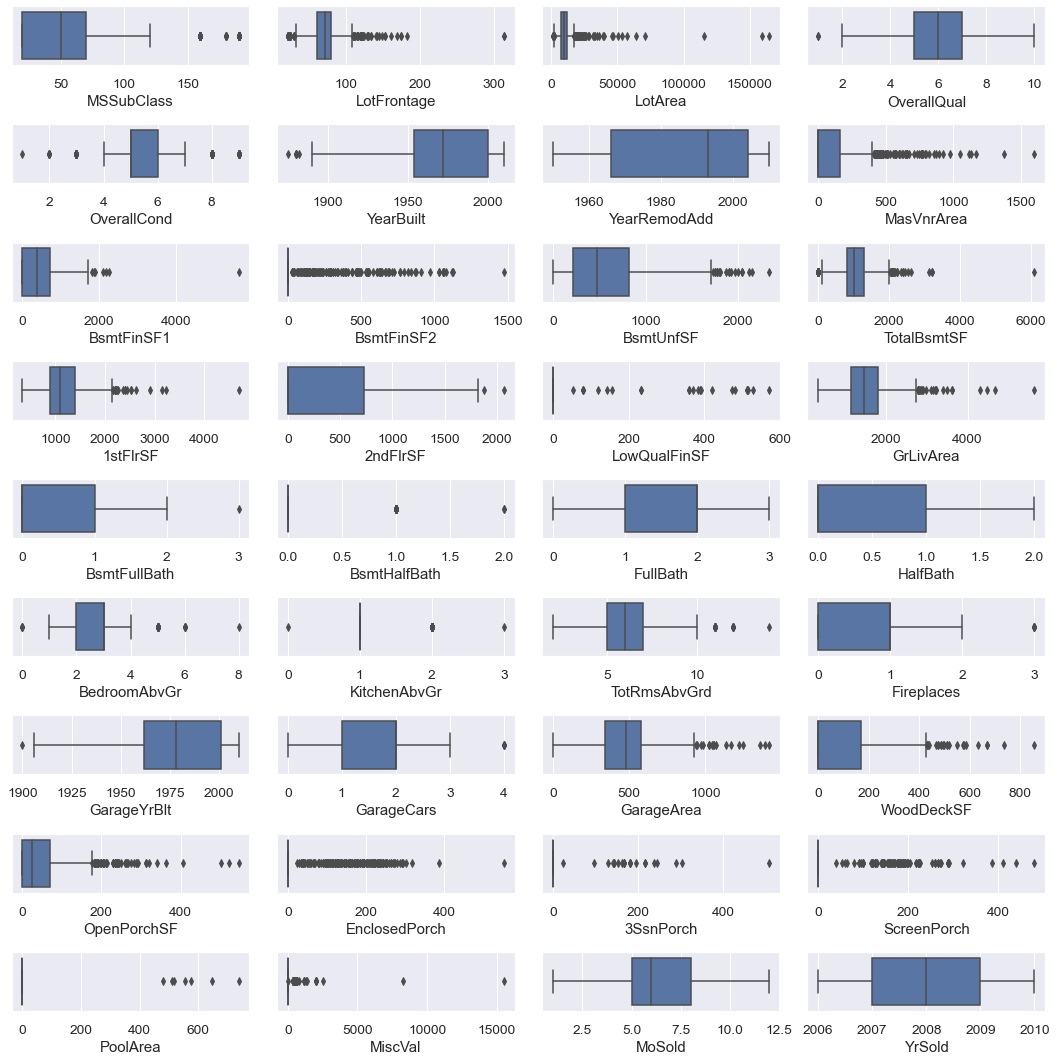

In [59]:
n_rows = 9
n_cols = 4
fig, ax = plt.subplots(n_rows, n_cols, figsize=(15,15))
print('\t\t\tBOXPLOT fOR NUMERICAL BEFORE REMOVING OUTLIERS FROM THEM')
i=0;j=0;k=0;
while i<n_rows:
    while j<n_cols:
        sns.boxplot(df_train[new_num_var[k]], ax=ax[i, j])
        k+=1;j+=1
    j=0;i+=1
plt.tight_layout()    
plt.show()

In [60]:
def removeOutliers(new_num_var):
    global df_train
    for i in range(len(new_num_var)):
        q1 = df_train[new_num_var[i]].quantile(0.25)
        q3 = df_train[new_num_var[i]].quantile(0.75)
        IQR = q3-q1
        minimum = q1 - 1.5 * IQR
        maximum = q3 + 1.5 * IQR        
        df_train.loc[(df_train[new_num_var[i]] <= minimum), new_num_var[i]] = minimum
        df_train.loc[(df_train[new_num_var[i]] >= maximum), new_num_var[i]] = maximum  

In [61]:
removeOutliers(new_num_var)


			BOXPLOT FOR NUMERICAL COLUMNS AFTER REMOVING OUTLIERS FORM THEM:


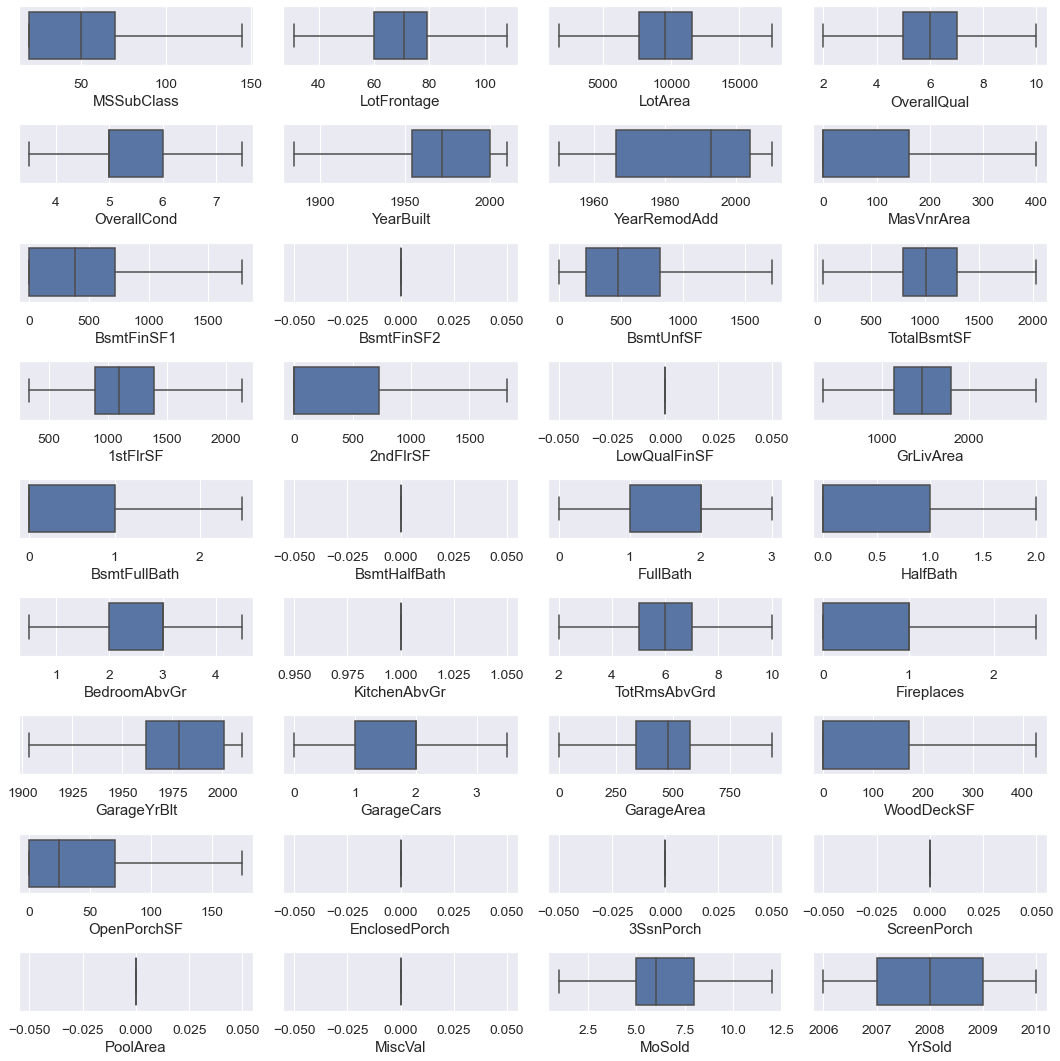

In [62]:
n_rows = 9
n_cols = 4
fig, ax = plt.subplots(n_rows, n_cols, figsize=(15,15))
print('\t\t\tBOXPLOT FOR NUMERICAL COLUMNS AFTER REMOVING OUTLIERS FORM THEM:')
i=0;j=0;k=0;
while i<n_rows:
    while j<n_cols:
        sns.boxplot(df_train[new_num_var[k]], ax=ax[i, j])
        k+=1;j+=1
    j=0;i+=1
plt.tight_layout()
plt.show()

In [63]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
#For train data
df_train=df_train.apply(LabelEncoder().fit_transform)
print('For train data')
print(df_train.head())
print('\n\n')
#For test data
df_test_le=df_test.apply(LabelEncoder().fit_transform)
print('For test data')
print(df_test_le.head())

For train data
   MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0          11         3           39       76       1      1         0   
1           0         3           64      804       1      1         0   
2           5         3           61      445       1      1         0   
3           0         3           74      628       1      1         0   
4           0         3           39      817       1      1         0   

   LandContour  Utilities  LotConfig  ...  PoolArea  PoolQC  Fence  \
0            3          0          4  ...         0       3      4   
1            3          0          4  ...         0       3      4   
2            3          0          1  ...         0       3      4   
3            3          0          4  ...         0       3      2   
4            3          0          2  ...         0       3      4   

   MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0            1        0       1       1  

In [64]:
print('Train data')
print(df_train.info())
print("\n")
print('Test data')
print(df_test_le.info())

Train data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   MSSubClass     1168 non-null   int64
 1   MSZoning       1168 non-null   int32
 2   LotFrontage    1168 non-null   int64
 3   LotArea        1168 non-null   int64
 4   Street         1168 non-null   int32
 5   Alley          1168 non-null   int32
 6   LotShape       1168 non-null   int32
 7   LandContour    1168 non-null   int32
 8   Utilities      1168 non-null   int32
 9   LotConfig      1168 non-null   int32
 10  LandSlope      1168 non-null   int32
 11  Neighborhood   1168 non-null   int32
 12  Condition1     1168 non-null   int32
 13  Condition2     1168 non-null   int32
 14  BldgType       1168 non-null   int32
 15  HouseStyle     1168 non-null   int32
 16  OverallQual    1168 non-null   int64
 17  OverallCond    1168 non-null   int64
 18  YearBuilt      1168 non-null   int64


In [65]:
X = df_train.drop('SalePrice', axis=1)
y = df_train['SalePrice'].values

In [66]:
X.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,11,3,39,76,1,1,0,3,0,4,...,0,0,3,4,1,0,1,1,8,4
1,0,3,64,804,1,1,0,3,0,4,...,0,0,3,4,1,0,9,1,8,4
2,5,3,61,445,1,1,0,3,0,1,...,0,0,3,4,1,0,5,1,8,4
3,0,3,74,628,1,1,0,3,0,4,...,0,0,3,2,1,0,0,4,0,4
4,0,3,39,817,1,1,0,3,0,2,...,0,0,3,4,1,0,5,3,8,4


In [67]:
sc = StandardScaler()
X = sc.fit_transform(X)

#For test data
price_test = sc.fit_transform(df_test_le)

In [68]:
X


array([[ 1.70759409, -0.02164599,  0.02879392, ..., -0.60548713,
         0.33003329,  0.20793187],
       [-1.02115826, -0.02164599,  1.45626837, ..., -0.60548713,
         0.33003329,  0.20793187],
       [ 0.21918372, -0.02164599,  1.28497144, ..., -0.60548713,
         0.33003329,  0.20793187],
       ...,
       [ 1.95566248, -0.02164599, -2.19806622, ...,  0.8992128 ,
         0.33003329,  0.20793187],
       [ 0.46725211, -4.76211672, -1.17028462, ...,  0.14686284,
         0.33003329,  0.20793187],
       [ 0.21918372, -0.02164599,  0.02879392, ..., -1.3578371 ,
         0.33003329,  0.20793187]])

In [69]:
maxScore = 0
maxRS = 0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    acc=r2_score(y_test,pred_test)
    if acc>maxScore:
        maxScore=acc
        maxRS=i
print('Best score is',maxScore,'on Random State',maxRS)

Best score is 0.9240949406322587 on Random State 84


In [70]:
model = [LinearRegression(),Lasso(alpha=1.0),Ridge(alpha=1.0),DecisionTreeRegressor(criterion='squared_error'),
         KNeighborsRegressor()]
for i in model:
    X_train1,X_test1,y_train1,y_test1 = train_test_split(X,y, test_size = 0.3, random_state =maxRS)
    i.fit(X_train1,y_train1)
    pred = i.predict(X_test1)
    print('Train Score of', i , 'is:' , i.score(X_train1,y_train1))
    print("r2_score", r2_score(y_test1, pred))
    print("mean_squred_error", mean_squared_error(y_test1, pred))
    print("RMSE", np.sqrt(mean_squared_error(y_test1, pred)),"\n")

Train Score of LinearRegression() is: 0.8949552137686356
r2_score 0.9240949406322587
mean_squred_error 1818.3788124788762
RMSE 42.642453171444956 

Train Score of Lasso() is: 0.8917401227582257
r2_score 0.9261040022874991
mean_squred_error 1770.249805304877
RMSE 42.074336659118906 

Train Score of Ridge() is: 0.8949527937715196
r2_score 0.9242053679462532
mean_squred_error 1815.733419803356
RMSE 42.611423583393176 

Train Score of DecisionTreeRegressor() is: 1.0
r2_score 0.7169955637046532
mean_squred_error 6779.643874643874
RMSE 82.33859286290891 

Train Score of KNeighborsRegressor() is: 0.8761395853867664
r2_score 0.8369131698871278
mean_squred_error 3906.9021082621084
RMSE 62.505216648389506 

